# WeatherPy

## Starter Code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the cities list using the citipy library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


### Use OpenWeatherApp Api to retrieve weather data from cities generated

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city.replace(" ","+") + '&units=' + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | angaur state
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | puerto ayacucho
Processing Record 8 of Set 1 | umbauba
Processing Record 9 of Set 1 | okha
Processing Record 10 of Set 1 | cozumel
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | nova vicosa
Processing Record 16 of Set 1 | tafuna
Processing Record 17 of Set 1 | gaigeturi
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | la palma
Processing Record 21 of Set 1 | viedma
Processing Record 22 of Set 1 | iqaluit
Proc

Processing Record 40 of Set 4 | holualoa
Processing Record 41 of Set 4 | hirara
Processing Record 42 of Set 4 | inongo
Processing Record 43 of Set 4 | owando
Processing Record 44 of Set 4 | nar'yan-mar
Processing Record 45 of Set 4 | backa topola
Processing Record 46 of Set 4 | punta arenas
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | mogadishu
Processing Record 49 of Set 4 | college
Processing Record 0 of Set 5 | cambria
Processing Record 1 of Set 5 | zhanjiang
Processing Record 2 of Set 5 | amga
Processing Record 3 of Set 5 | channarayapatna
Processing Record 4 of Set 5 | las palmas de gran canaria
Processing Record 5 of Set 5 | barra
Processing Record 6 of Set 5 | nchelenge
Processing Record 7 of Set 5 | tofol
Processing Record 8 of Set 5 | mossendjo
Processing Record 9 of Set 5 | itoman
Processing Record 10 of Set 5 | khonsa
Processing Record 11 of Set 5 | bilibino
Processing Record 12 of Set 5 | saksaul'skiy
City not found. Skipping...
Processing Reco

Processing Record 31 of Set 8 | mawu
Processing Record 32 of Set 8 | camana
Processing Record 33 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 34 of Set 8 | fort irwin
Processing Record 35 of Set 8 | hachinohe
Processing Record 36 of Set 8 | korsakov
Processing Record 37 of Set 8 | amungan
Processing Record 38 of Set 8 | la sarre
Processing Record 39 of Set 8 | al bardiyah
Processing Record 40 of Set 8 | ad-damazin
Processing Record 41 of Set 8 | san martin
Processing Record 42 of Set 8 | alo
Processing Record 43 of Set 8 | kayyerkan
Processing Record 44 of Set 8 | farasan
Processing Record 45 of Set 8 | enewetak
Processing Record 46 of Set 8 | kandahar
Processing Record 47 of Set 8 | mili
Processing Record 48 of Set 8 | saint-francois
Processing Record 49 of Set 8 | malango
Processing Record 0 of Set 9 | uliastay
Processing Record 1 of Set 9 | l'aquila
Processing Record 2 of Set 9 | sandpoint
Processing Record 3 of Set 9 | pailon
Processing Record 4 of Set 

Processing Record 21 of Set 12 | kantunilkin
Processing Record 22 of Set 12 | dryden
Processing Record 23 of Set 12 | sittwe
Processing Record 24 of Set 12 | rongelap
Processing Record 25 of Set 12 | kabansk
Processing Record 26 of Set 12 | auki
Processing Record 27 of Set 12 | thunder bay
Processing Record 28 of Set 12 | dalandzadgad
Processing Record 29 of Set 12 | coahuayana de hidalgo
Processing Record 30 of Set 12 | kodinsk
Processing Record 31 of Set 12 | pemangkat
Processing Record 32 of Set 12 | pumiao
Processing Record 33 of Set 12 | stephenville
Processing Record 34 of Set 12 | la ronge
Processing Record 35 of Set 12 | newport
Processing Record 36 of Set 12 | troitsko-pechorsk
Processing Record 37 of Set 12 | hammerfest
Processing Record 38 of Set 12 | gospic
Processing Record 39 of Set 12 | mayahi
Processing Record 40 of Set 12 | penn yan
Processing Record 41 of Set 12 | brisas barra de suchiate
Processing Record 42 of Set 12 | new norfolk
Processing Record 43 of Set 12 | um

In [4]:
city_df = pd.DataFrame(city_data)
city_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,angaur state,6.9060,134.1300,27.90,81,100,8.70,PW,1689535135
1,adamstown,-25.0660,-130.1015,20.79,79,100,3.15,PN,1689534908
2,port-aux-francais,-49.3500,70.2167,2.00,54,92,12.92,TF,1689534898
3,stanley,54.8680,-1.6985,16.77,74,20,5.66,GB,1689535137
4,ust-nera,64.5667,143.2000,9.96,78,12,3.86,RU,1689535137


In [6]:
city_df.to_csv('../output_data/cities.csv', index_label='City_ID')

In [7]:
city_df = pd.read_csv('../output_data/cities.csv', index_col='City_ID')
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,angaur state,6.9060,134.1300,27.90,81,100,8.70,PW,1689535135
1,adamstown,-25.0660,-130.1015,20.79,79,100,3.15,PN,1689534908
2,port-aux-francais,-49.3500,70.2167,2.00,54,92,12.92,TF,1689534898
3,stanley,54.8680,-1.6985,16.77,74,20,5.66,GB,1689535137
4,ust-nera,64.5667,143.2000,9.96,78,12,3.86,RU,1689535137


## Create Scatter plots

### Latitude vs Temperature

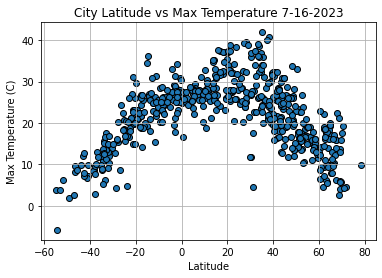

In [16]:
x_axis = city_df['Lat']
y_axis = city_df['Max Temp']
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black')
plt.title('City Latitude vs Max Temperature 7-16-2023')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.savefig('../output_data/Fig1.png')
plt.show()

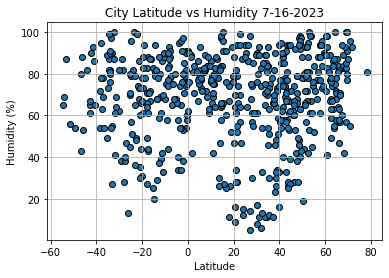

In [19]:
x_axis = city_df['Lat']
y_axis = city_df['Humidity']
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black')
plt.title('City Latitude vs Humidity 7-16-2023')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('../output_data/Fig2.png')
plt.show()

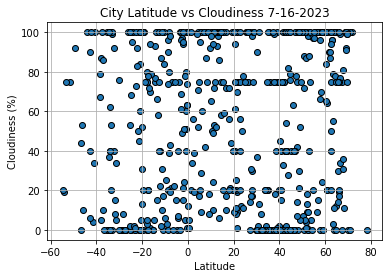

In [18]:
x_axis = city_df['Lat']
y_axis = city_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black')
plt.title('City Latitude vs Cloudiness 7-16-2023')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../output_data/Fig3.png')
plt.show()

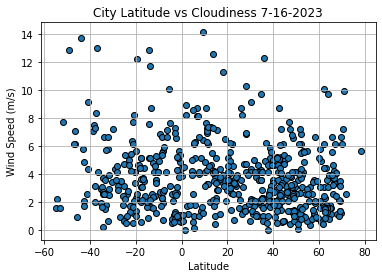

In [20]:
x_axis = city_df['Lat']
y_axis = city_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black')
plt.title('City Latitude vs Cloudiness 7-16-2023')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.savefig('../output_data/Fig4.png')
plt.show()

In [22]:
northern_hemi = city_df[(city_df["Lat"] >= 0)]
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,angaur state,6.9060,134.1300,27.90,81,100,8.70,PW,1689535135
3,stanley,54.8680,-1.6985,16.77,74,20,5.66,GB,1689535137
4,ust-nera,64.5667,143.2000,9.96,78,12,3.86,RU,1689535137
6,puerto ayacucho,5.6639,-67.6236,29.34,73,29,1.78,VE,1689535138
8,okha,53.5739,142.9478,10.65,98,98,4.86,RU,1689535139


In [23]:
southern_hemi = city_df[(city_df['Lat'] <= 0)]
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,20.79,79,100,3.15,PN,1689534908
2,port-aux-francais,-49.3500,70.2167,2.00,54,92,12.92,TF,1689534898
5,east london,-33.0153,27.9116,17.63,55,99,1.77,ZA,1689535137
7,umbauba,-11.3833,-37.6578,25.50,69,31,3.56,BR,1689535138
14,nova vicosa,-17.8919,-39.3719,24.32,71,80,3.67,BR,1689535141


The r-squared is: 0.4411086248933319


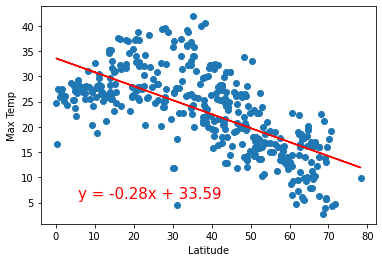

In [28]:
# Plot the different factors in a scatter plot
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,5.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7329268593622771


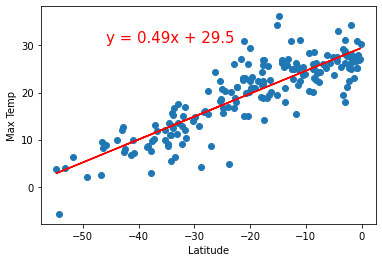

In [31]:
# Plot the different factors in a scatter plot
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45.8,30.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004133095879755996


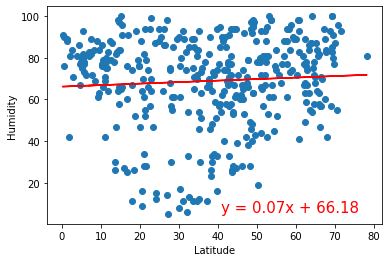

In [32]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40.8,5.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 2.2799396427967984e-05


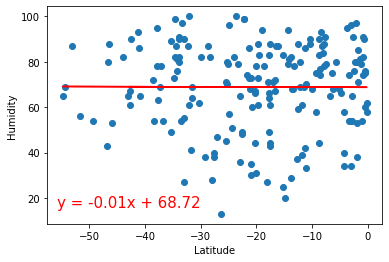

In [34]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.8,15.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00013170101056698023


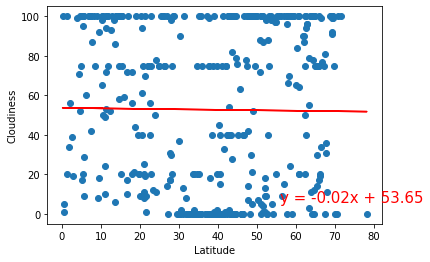

In [35]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55.8,5.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.003502129526219243


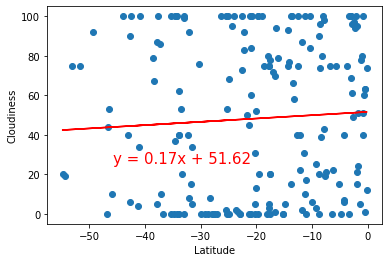

In [37]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45.8,25.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03430502243660409


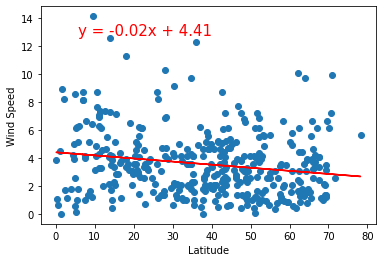

In [38]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,12.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.021164379654175832


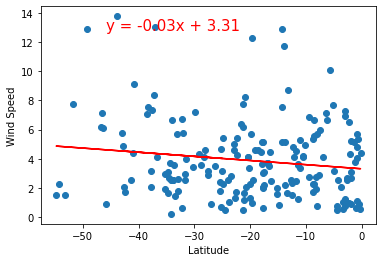

In [40]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45.8,12.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()